In [1]:
import pandas as pd

persona = pd.read_csv('../../datos/PERSONA-P03.csv')

persona.sample(5)

,radio,edad_0,edad_1,edad_2,edad_3,edad_4,edad_5,edad_6,edad_7,edad_8,...,edad_102,edad_103,edad_104,edad_105,edad_106,edad_107,edad_108,edad_109,edad_110,TOTAL
18257,64413209,11,11,11,10,9,8,9,10,12,...,0,0,0,0,0,0,0,0,0,721
34914,301131003,1,0,1,1,0,2,1,3,2,...,0,0,0,0,0,0,0,0,0,97
3916,60283009,23,30,29,29,29,38,30,32,33,...,0,0,0,0,0,0,0,0,0,1318
30457,220630105,11,9,15,10,11,19,8,14,12,...,0,0,0,0,0,0,0,0,0,767
52087,901051006,17,14,17,14,22,20,22,17,29,...,0,0,0,0,0,0,0,0,0,1289


In [2]:
import geopandas as gpd

pxlocdatos = gpd.read_file("../../datos/link_areas/pxlocdatos.shp")

pxlocdatos.sample(3)

,link,codpcia,coddpto,codloc,provincia,departamen,localidad,func_loc,tiploc,tip2loc,...,longitud,xgk,ygk,varones,mujeres,personas,hogares,viv_part_h,viv_part,geometry
1009,14098310,14,098,310,Córdoba,Río Cuarto,Villa Santa Eugenia,0,1,0,...,64 44 14,6383748.0,4337040.0,69.0,57.0,126.0,34.0,34.0,139.0,POINT (3618057 6385658)
2755,70119040,70,119,040,San Juan,Valle Fértil,Los Baldecitos,0,1,0,...,67 42 02,2625108.0,6656494.0,25.0,28.0,53.0,17.0,17.0,24.0,POINT (3336194.5 6655775.5)
2082,50056010,50,056,010,Mendoza,Lavalle,Barrio Alto del Olvido,0,1,0,...,68 35 32,2538246.0,6385433.0,138.0,128.0,266.0,68.0,66.0,71.0,POINT (3256821 6382536)


In [3]:
pxlocdatos.columns

Index([      u'link',    u'codpcia',    u'coddpto',     u'codloc',
        u'provincia', u'departamen',  u'localidad',   u'func_loc',
           u'tiploc',    u'tip2loc',    u'latitud',   u'longitud',
              u'xgk',        u'ygk',    u'varones',    u'mujeres',
         u'personas',    u'hogares', u'viv_part_h',   u'viv_part',
         u'geometry'],
      dtype='object')

In [4]:
pxlocdatos.crs

{u'ellps': u'WGS84',
 u'k': 1,
 u'lat_0': -90,
 u'lon_0': -66,
 u'no_defs': True,
 u'proj': u'tmerc',
 u'units': u'm',
 u'x_0': 3500000,
 u'y_0': 0}

In [5]:
Buenos_Aires_datos = gpd.read_file("../../datos/Buenos Aires/Buenos_Aires_con_datos.shp")
Buenos_Aires_datos.sample(5)

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
6792,307155,064415910,570.0,621.0,1191.0,385.0,411.0,361.0,"POLYGON ((4226697.336795198 6111329.748178905,..."
17077,286955,067280801,62.0,52.0,114.0,38.0,63.0,38.0,"POLYGON ((4094620.313318326 6172585.139583239,..."
14180,284748,060840601,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4020598.240887428 5822187.453159402,..."
4887,334921,067840202,257.0,264.0,521.0,160.0,208.0,157.0,"POLYGON ((4074338.101341895 6154632.043071774,..."
11914,285899,064480903,7.0,4.0,11.0,3.0,5.0,3.0,"POLYGON ((3941888.882785541 5800656.079381049,..."


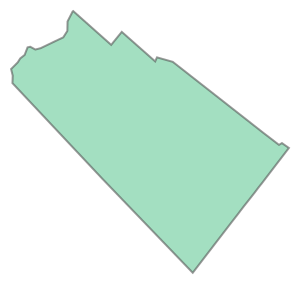

In [6]:
Buenos_Aires_datos['geometry'][10]

In [7]:
Buenos_Aires_datos['prov'] = Buenos_Aires_datos['link'].str[:2]
Buenos_Aires_datos['depto'] = Buenos_Aires_datos['link'].str[2:5]
Buenos_Aires_datos['dpto_link'] = Buenos_Aires_datos['link'].str[:5]

In [8]:
CABA_datos = gpd.read_file("../../datos/CABA/cabaxrdatos.shp")

In [9]:
# centro = pxlocdatos.loc[pxlocdatos['provincia'] == u'Ciudad Aut\xf3noma de Buenos Aires']['geometry'][0]

In [10]:

# pxlocdatos['distancia_centro'] = [centro.distance(m) for m in pxlocdatos.geometry]
# pxlocdatos['dpto_link'] = pxlocdatos['codpcia'] + pxlocdatos['coddpto']
# pxlocdatos_AMBA = pxlocdatos.sort_values(by = 'distancia_centro').head(50)

# persona.rename(columns={'radio': 'link', 'TOTAL': 'totalpobl'}, inplace=True)
# persona['link'] = persona['link'].astype(str).str.zfill(9)

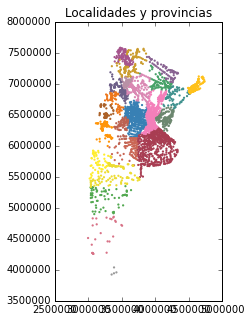

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1, figsize=(3, 5))

pxlocdatos.plot(ax = ax, column = 'codpcia', edgecolor = 'None', marker = '.')
plt.title('Localidades y provincias')
plt.savefig('../../source/img/localidades_provincia.png')
plt.show()

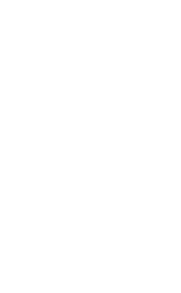

In [12]:
import matplotlib
matplotlib.rc('axes',edgecolor='w')

f, ax = plt.subplots(1, figsize=(3, 5))

pxlocdatos.plot(ax = ax, color = 'w', edgecolor = 'None', marker = '.')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('../../img/logo_localidades_arg.png', transparent=True)